# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Rolly Dhea Venesia Sibuea
- **Email:** dheavenesia@gmail.com
- **ID Dicoding:** rolly_dhea_venesia_sibuea_Kxo9

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah pesanan berdasarkan status "canceled" pada 3 tahun terakhir?
- Kota mana saja yang masuk top 10 besar distribusi jumlah pesanan berdasarkan status "delivered"?
- Bagaimana perbandingan jumlah pelanggan baru antara bulan yang berbeda pada tahun 2017?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Orders Dataset**

In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dheaaavs/dataset_project_dicoding/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Di bagian dataset orders terdapat data order_id	customer_id	order_status	order_purchase_timestamp	order_approved_at	order_delivered_carrier_date	order_delivered_customer_date	order_estimated_delivery_date

**Customers Dataset**

In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dheaaavs/dataset_project_dicoding/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Di bagian dataset customers terdapat data customer_id	customer_unique_id	customer_zip_code_prefix	customer_city	customer_state

**Insight:**
Dibagian gathering data kita dapat mengumpulkan data data dari beberapa dataset

- Di bagian dataset orders terdapat data order_id customer_id order_status order_purchase_timestamp order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date

- Di bagian dataset customers terdapat data customer_id customer_unique_id customer_zip_code_prefix customer_city customer_state

### Assessing Data

**Menilai Tabel Orders_df**

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Menilai Tabel Customers_df**

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**

*   orders_df
    - Tipe data : order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sebaiknya dikonversi ke tipe datetime
    - Missing value : Terdapat 160 missing value pada kolom order_approved_at, 1783 missing value di kolom order_delivered_carrier_date, 2965 missing value di kolom order_delivered_customer_date
    - Duplicate data : -
    - Inaccurate value : -




### Cleaning Data

**Membersihkan tabel orders_df**

In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


**Missing Value**

In [ ]:
#menangani missing value
orders_df['order_approved_at'] = orders_df['order_approved_at'].ffill()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].ffill()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].ffill()

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Mengubah tipe data**

In [ ]:
#mengubah order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Mengatasi missing value yang ada pada order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dengan cara menggunakan ffill (fill forward)
- Mengubah tipe data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,
order_estimated_delivery_date menjadi tipe data datetime

### **Menggabungkan Data**

**Menggabungkan data orders_df dan customers_df**

In [ ]:
customers_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
# Menampilkan 5 baris pertama
customers_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,13.98,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,9.39,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,5.91,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,28.29,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,11.28,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
41029,7898e022985aa27661bbe054a10b41c9,82338b3cf088b940712ece972afeb183,17560,vera cruz,SP
55609,0295853908b4ba8c84a8e8b550eef3a1,71bc312e28f745e3f1fd70f15c5b194a,5612,sao paulo,SP
56548,92ea14246ba314c5642045e9152b75a1,c44accd62100515eee4c93d72f232cbc,12440,pindamonhangaba,SP
12204,63a710384d8293cd7dc192503569a34e,aa36422413a4f36d85ac4952e85925d7,20060,rio de janeiro,RJ
24048,99178d9df4101d6d43e3d5214a80fe32,cc4ab3ff24f7421140ee31cbccc64d1f,11347,sao vicente,SP


In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.customer_id.is_unique

True

In [ ]:
# Mengelompokkan berdasarkan kota dan menghitung jumlah pelanggan unik
customer_group_sorted = customers_df.groupby(by='customer_city').customer_unique_id.nunique().sort_values(ascending=False)
print(customer_group_sorted)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64


Sebagian besar pelanggan berasal dari São Paulo, baik kota maupun
negara bagian, dengan distribusi yang cukup luas di Brasil berdasarkan kode pos.

### Explore orders_df

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
74287,80fa872d47da85872411a201a1a89dbd,78f06a489006676218bbd6653cc79c47,delivered,2018-05-07 16:44:43,2018-05-07 17:56:37,2018-05-09 12:12:00,2018-05-14 23:47:41,2018-05-25
50894,bdd7791c89953f5d1128e2568c740d1c,ca5fd3ba988087514c3b50b8a8eaa893,delivered,2018-03-30 19:55:15,2018-03-30 20:47:27,2018-04-03 01:03:59,2018-04-04 19:55:46,2018-04-12
35877,616f3163d12cbaf681d34413542802bd,2c12f9ea6567e1395d740ee2714f7339,delivered,2017-08-08 10:40:16,2017-08-08 10:50:16,2017-08-09 19:15:10,2017-08-15 22:15:26,2017-08-28
95440,54f0988d1c9f5f7f90410c09b2cbc6e5,58ef17eb85a447ae62ef8be1c5f06b0e,delivered,2018-02-25 22:27:06,2018-02-25 22:47:37,2018-02-27 18:19:16,2018-03-08 16:11:46,2018-03-19
81096,ad71363d48c02a2e93bc7f75ff187708,f038ed08b8c69afe5c0ca28ef6c5325f,delivered,2018-06-08 14:32:25,2018-06-08 16:30:41,2018-06-11 12:26:00,2018-06-14 15:42:14,2018-07-12


In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-06-01 13:15:43,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,4,522


In [ ]:
orders_df.order_id.is_unique

True

In [ ]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time_in_days = delivery_time.dt.total_seconds() / 86400

# Menambahkan kolom baru 'delivery_time' dalam satuan hari
orders_df['delivery_time'] = round(delivery_time_in_days, 2)
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
23014,dd33f743f8af5bb74051a4e3935388ba,95f347a9955c610485ec8ce536ee403f,delivered,2018-06-19 23:23:53,2018-06-19 23:35:08,2018-06-20 14:56:00,2018-06-22 20:51:20,2018-06-29,2.89
40628,57b27ed317a9d0ed3ed31b5a50392b51,03d9a01006461e5674fb618206c83526,delivered,2018-04-30 20:36:38,2018-05-01 03:15:19,2018-05-03 11:17:00,2018-05-08 21:06:49,2018-05-23,8.02
95808,b8783952ffb07e62bcd0b709e8977f60,a891a086c7607d2b58d8186721a34f17,delivered,2017-11-22 12:50:57,2017-11-22 12:58:55,2017-11-29 22:32:34,2017-12-06 22:37:04,2017-12-04,14.41
46136,1ba8d0116eff4ce64f79e9094f241f6b,20442b054a06b68bb23acd5fc74014bd,delivered,2017-11-25 11:34:38,2017-11-25 11:51:44,2017-11-29 23:47:12,2017-12-23 17:52:13,2017-12-15,28.26
76419,5732c4d32ae81ea346107cb61aa2061b,a4a98a1e1a73eb104733646f6a473d8a,delivered,2018-03-04 21:52:46,2018-03-04 22:08:40,2018-03-05 20:25:28,2018-04-16 19:38:53,2018-03-22,42.91


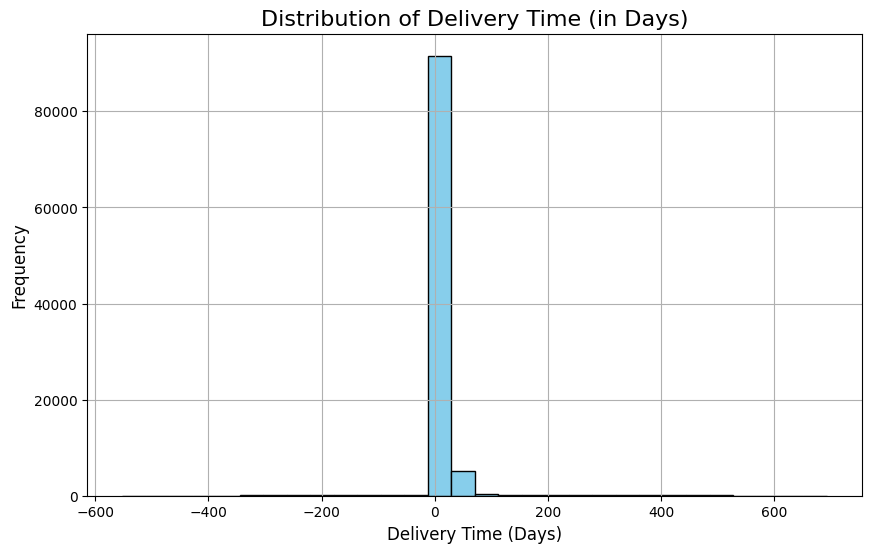

In [ ]:
plt.figure(figsize=(10,6))
orders_df['delivery_time'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Delivery Time (in Days)', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

In [ ]:
# Mengelompokkan berdasarkan status pesanan dan menghitung jumlah pesanan unik
order_group_sorted = orders_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)
print(order_group_sorted)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64


- Terdapat 99.441 entri dalam dataset ini, yang menunjukkan volume pemesanan yang signifikan.

- Terdapat 8 status pemesanan unik, dengan status "delivered" menjadi status yang paling umum, tercatat sebanyak 96.478 kali, menunjukkan mayoritas pesanan telah berhasil dikirim.

- Tanggal estimasi pengiriman paling umum adalah 2017-12-20, yang menunjukkan bahwa ada banyak pesanan yang diharapkan tiba pada waktu yang sama.

### Explore all_data

Menghubungkan semua data

In [ ]:
all_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
# Menampilkan 5 baris pertama
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,13.98,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,9.39,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,5.91,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,28.29,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,11.28,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


In [ ]:
all_df.groupby(by=["customer_city", "order_status"]).agg({
    "order_id": "count"  # Menghitung jumlah pesanan
})

,,order_id
customer_city,order_status,
abadia dos dourados,delivered,3
abadiania,delivered,1
abaete,delivered,12
abaetetuba,delivered,11
abaiara,delivered,2
...,...,...
xinguara,delivered,9
xique-xique,delivered,3
zacarias,delivered,2


**Insight:**
- Hasil explore customer dengan mengelompokkan kota kota ternyata sebagian besar pelanggan berasal dari São Paulo, baik kota maupun negara bagian, dengan distribusi yang cukup luas.
- Hasil explore orders dengan mengelompokkan berdasarkan status yang ada dan ternyata status delivered merupakan status yang paling umum.
- Hasil explore dari all_data kita dapat mengelompokkan berdasarkan kota (customer_city) dan status pesanan (order_status), kemudian menghitung jumlah pesanan untuk setiap kombinasi kota dan status.

In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana distribusi jumlah pesanan berdasarkan status "canceled" pada 3 tahun terakhir?

In [ ]:
all_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
79219,5a509a6537686bc8e701a4461631e965,cb38d00c9e5573f32758d4d3dfa382ab,delivered,2018-05-21 07:28:32,2018-05-22 08:16:33,2018-05-22 13:43:00,2018-06-04 15:02:31,2018-06-13,14.32,2dec450164b26f0f45ccbee550cd9091,5363,sao paulo,SP
1182,50da5576c9b517983b6f5fcf44863cfe,02faaf661d80bd26b06ca44de75a20c5,delivered,2018-08-05 17:49:07,2018-08-05 18:24:10,2018-08-09 12:42:00,2018-08-17 17:02:54,2018-08-23,11.97,ed88bc440d530e4a7cca8bb4f2c110d6,37900,passos,MG
34671,b775461d5210de56e464cec14c813e28,59b142799358cbb79e045d6db8cc1ae1,delivered,2018-04-20 08:09:12,2018-04-20 08:32:08,2018-04-20 23:03:47,2018-04-24 21:08:59,2018-05-09,4.54,4ad3fc10f54819c39ecfcb7eb3eae348,13173,sumare,SP
14229,12a72e49c959db8d7552036e53a67f49,24965a26ac0ca8671c6c057ee371c06f,delivered,2018-07-30 12:34:38,2018-07-30 16:05:08,2018-07-31 13:24:00,2018-08-09 15:28:46,2018-08-14,10.12,29213b1365c936a2bbce9010324ff7cd,8131,sao paulo,SP
68960,6b6291ce14ed6c6cd2df883635e6c704,b10d75093b79892be584f21b93a7fb35,delivered,2018-03-21 12:40:22,2018-03-21 12:55:33,2018-04-03 23:05:39,2018-05-06 13:24:43,2018-04-13,46.03,7b631c599738c7860f228fe8a4c4d220,28897,rio das ostras,RJ


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.44
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.78
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.39
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.21
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.87


In [ ]:
# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_year'] = all_df['order_purchase_timestamp'].dt.year
canceled_orders_df = all_df[all_df['order_status'] == 'canceled']

# Mengelompokkan data berdasarkan tahun
yearly_canceled_count = canceled_orders_df.groupby('order_year').size().reset_index(name='order_count')

yearly_canceled_count.head()

,order_year,order_count
0,2016,26
1,2017,265
2,2018,334


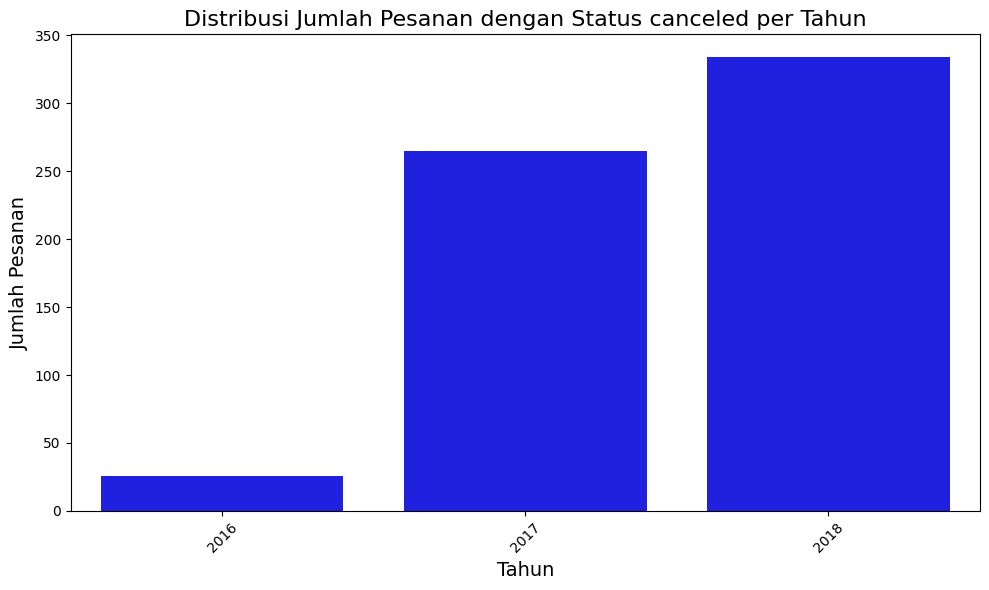

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(10, 6))

# Membuat grafik batang
sns.barplot(data=yearly_canceled_count, x='order_year', y='order_count', color='blue')

# Menambahkan judul dan label
plt.title('Distribusi Jumlah Pesanan dengan Status canceled per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

Untuk menjawab pertanyaan ini, langkah pertama yang perlu dilakukan adalah mengubah kolom `order_purchase_timestamp` menjadi tipe datetime. Selanjutnya, kita perlu mengekstrak tahun dari kolom tersebut dan memfilter data untuk menyisakan hanya yang memiliki status "canceled." Setelah itu, data dapat dikelompokkan berdasarkan tahun. Hasil pengelompokan ini akan divisualisasikan menggunakan grafik batang (barplot) untuk memberikan gambaran yang jelas tentang distribusi jumlah pesanan yang dibatalkan setiap tahunnya.

###Kota mana saja yang masuk top 10 besar distribusi jumlah pesanan berdasarkan status "delivered"?

In [ ]:
# Memfilter hanya yang status 'delivered' dan tahun 2018
delivered_orders_2018_df = all_df[(all_df['order_status'] == 'delivered') & (all_df['order_year'] == 2018)]

# Mengelompokkan data berdasarkan kota
city_delivered_count_2018 = delivered_orders_2018_df.groupby('customer_city').size().reset_index(name='order_count')

# Mengambil 10 kota terbanyak
top_cities_2018 = city_delivered_count_2018.nlargest(10, 'order_count')

top_cities_2018.head()

,customer_city,order_count
2845,sao paulo,8891
2492,rio de janeiro,3376
365,belo horizonte,1527
447,brasilia,1193
913,curitiba,851


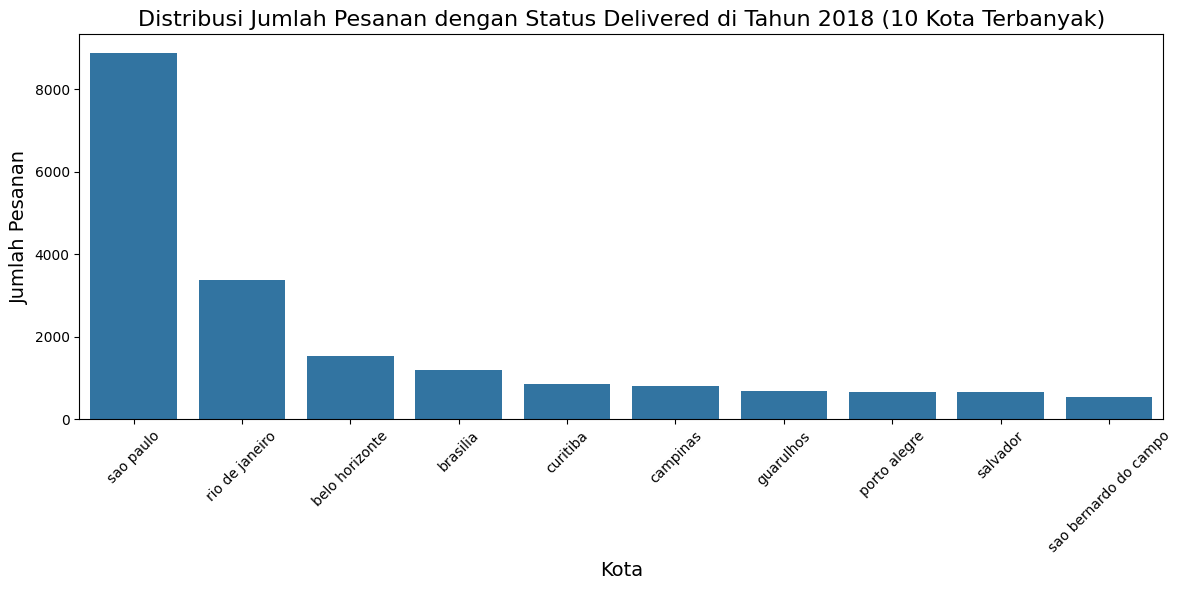

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities_2018, x='customer_city', y='order_count')
plt.title('Distribusi Jumlah Pesanan dengan Status Delivered di Tahun 2018 (10 Kota Terbanyak)', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

Untuk menjawab pertanyaan ini, langkah pertama yang perlu dilakukan adalah memfilter data untuk menyisakan hanya yang memiliki status "delivered" pada tahun 2018. Selanjutnya, kita akan mengelompokkan data berdasarkan kota. Dari pengelompokan tersebut, kita akan mengambil 10 kota dengan jumlah pesanan terbanyak. Hasil pengelompokan ini akan divisualisasikan menggunakan grafik batang (barplot) untuk memberikan gambaran yang jelas tentang distribusi jumlah pesanan dengan status "delivered" di tahun 2018 di 10 kota terbanyak.

###Bagaimana perbandingan jumlah pelanggan baru antara bulan yang berbeda pada tahun 2017?

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
new_customers_2017 = all_df[all_df['order_purchase_timestamp'].dt.year == 2017]

# Menghitung jumlah pelanggan baru per bulan
monthly_new_customers = new_customers_2017.resample('ME', on='order_purchase_timestamp').agg({
    'customer_id': 'nunique'
}).reset_index()

# Mengubah nama kolom untuk kejelasan
monthly_new_customers.rename(columns={
    'order_purchase_timestamp': 'month',
    'customer_id': 'new_customers'
}, inplace=True)

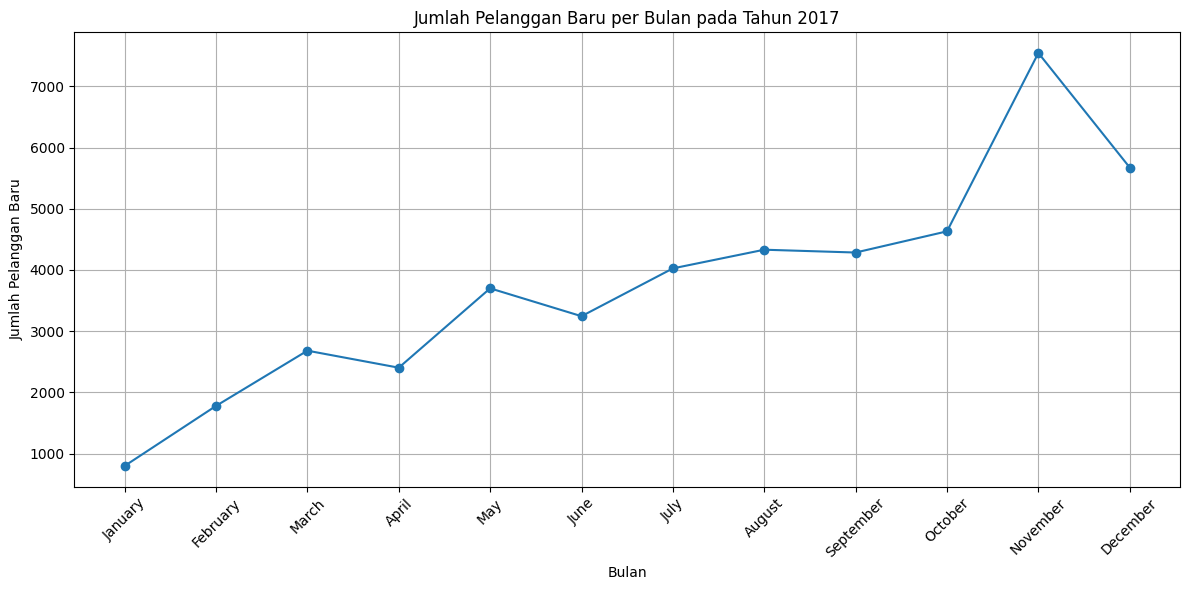

In [ ]:
# Membuat plot line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_new_customers['month'].dt.month_name(), monthly_new_customers['new_customers'], marker='o', linestyle='-')
plt.title('Jumlah Pelanggan Baru per Bulan pada Tahun 2017')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan Baru')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Untuk menjawab pertanyaan ini, langkah pertama yang perlu dilakukan adalah mengubah format kolom 'order_purchase_timestamp' menjadi tipe datetime. Selanjutnya, kita akan memfilter data untuk tahun 2017 dan menghitung jumlah pelanggan baru per bulan. Setelah itu, kita akan mengubah nama kolom untuk kejelasan. Hasil perhitungan ini akan divisualisasikan menggunakan grafik batang (barplot) untuk memberikan gambaran yang jelas tentang jumlah pelanggan baru per bulan pada tahun 2017.

**Insight:**
- Pertanyaan 1 (Grafik 1)

Terlihat bahwa jumlah pesanan yang dibatalkan (canceled) mengalami peningkatan signifikan dari tahun ke tahun.
1. 2016: Jumlah pesanan yang dibatalkan sangat rendah, hampir tidak terlihat dalam grafik.
2. 2017: Jumlah pesanan yang dibatalkan mulai meningkat, namun tetap berada di bawah 150.
3. 2018: Jumlah pesanan yang dibatalkan meningkat lagi, mencapai lebih dari 300 pesanan.


- Pertanyaan 2 (Grafik 2)


Berdasarkan grafik distribusi jumlah pesanan dengan status "delivered" di tahun 2018, berikut adalah sepuluh kota teratas berdasarkan jumlah pesanan:
1. São Paulo - 8,000+ pesanan
2. Rio de Janeiro - Sekitar 4,000 pesanan
3. Belo Horizonte - Sekitar 2,000 pesanan
4. Brasília - Sekitar 2,000 pesanan
5. Curitiba - Sekitar 1,500 pesanan
6. Campinas - Sekitar 1,200 pesanan
7. Guarulhos - Sekitar 1,200 pesanan
8. Porto Alegre - Sekitar 1,000 pesanan
9. Salvador - Sekitar 800 pesanan
10. São Bernardo do Campo - Sekitar 800 pesanan

- Pertanyaan 3 (Grafik 3)
Dari analisis bulanan jumlah pelanggan baru pada tahun 2017, terlihat adanya fluktuasi yang signifikan. Meskipun dimulai dengan angka yang rendah di Januari, jumlah pelanggan baru menunjukkan tren pertumbuhan yang konsisten hingga November, mencapai puncaknya di atas 6,000. Namun, di bulan-bulan tertentu seperti April dan Desember, terjadi penurunan jumlah pelanggan baru. Secara keseluruhan, tahun 2017 menunjukkan potensi pertumbuhan yang baik, terutama pada akhir tahun.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

last_order_date = all_df['order_purchase_timestamp'].max()

# Menghitung RFM
rfm_df = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'count',
}).reset_index()


rfm_df['monetary'] = rfm_df['order_id']
rfm_df['recency'] = (last_order_date - rfm_df['order_purchase_timestamp']).dt.days
rfm_df.columns = ['customer_id', 'last_order_date', 'frequency', 'monetary', 'recency']

# Menampilkan Data RFM
rfm_df.head()

,customer_id,last_order_date,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,1,337
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,1,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,1,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,1,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,1,198


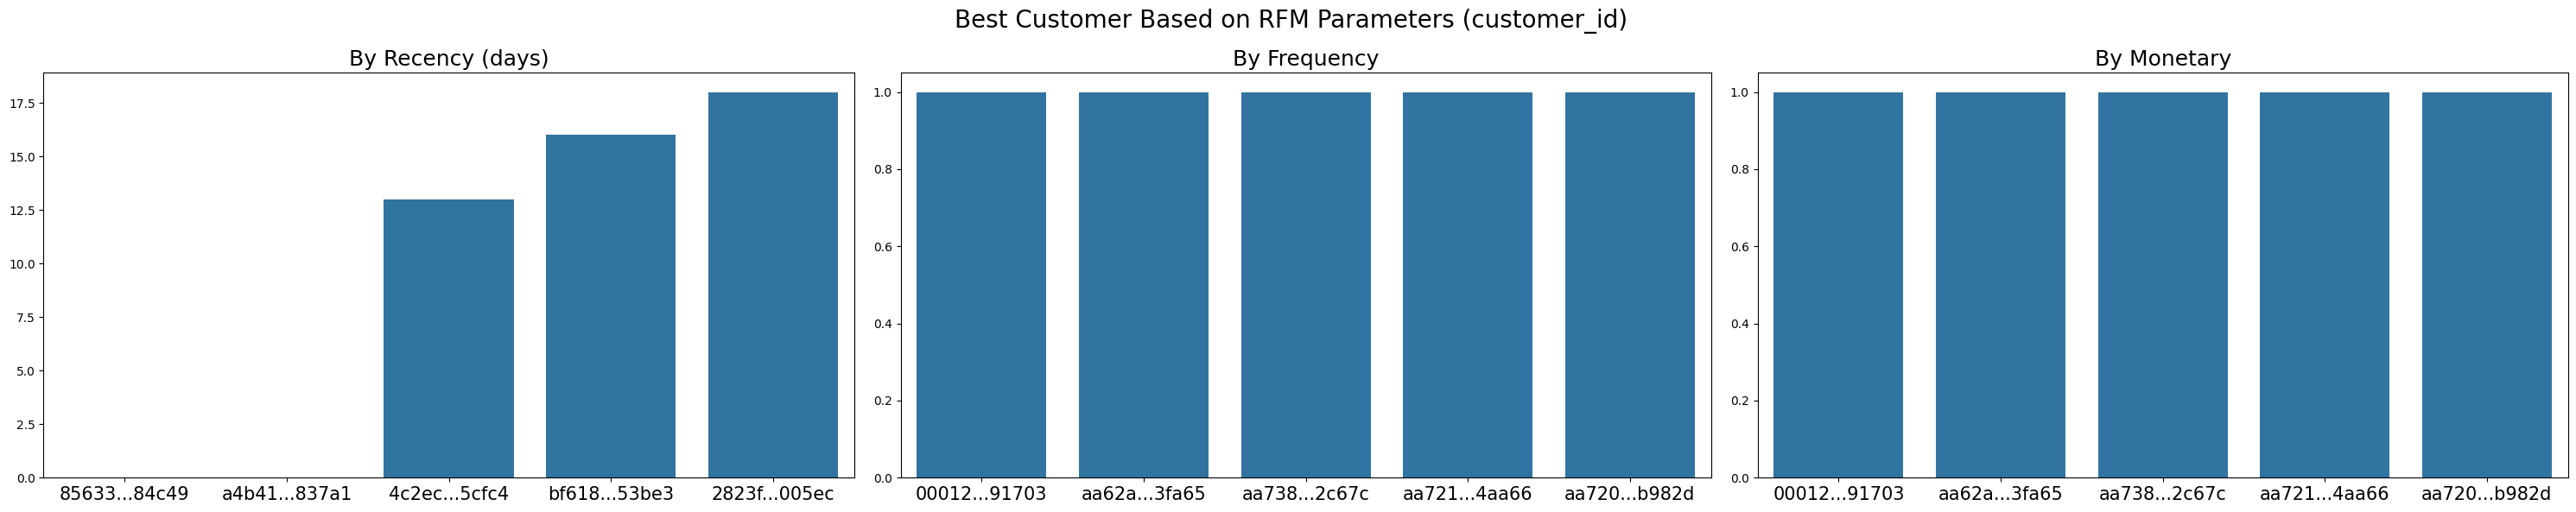

In [ ]:
# Memperpendek customer_id menjadi format 5 karakter pertama dan 5 karakter terakhir
rfm_df['short_customer_id'] = rfm_df['customer_id'].apply(lambda x: f"{x[:5]}...{x[-5:]}")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency Plot (5 customer dengan recency terendah)
sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Frequency Plot (5 customer dengan frequency tertinggi)
sns.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary Plot (5 customer dengan monetary tertinggi)
sns.barplot(y="monetary", x="short_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Menampilkan judul keseluruhan
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,last_order_date,frequency,monetary,recency,short_customer_id,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,1,337,00012...91703,34293.0,49721.0,49721.0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,1,458,00016...27140,16826.5,49721.0,49721.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,1,596,0001f...df079,2859.5,49721.0,49721.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,1,427,00024...6f1d5,21112.5,49721.0,49721.0
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,1,198,00037...7a9fb,66875.0,49721.0,49721.0


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,last_order_date,frequency,monetary,recency,short_customer_id,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,1,337,00012...91703,34.485949,100.0,100.0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,1,458,00016...27140,16.921174,100.0,100.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,1,596,0001f...df079,2.875589,100.0,100.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,1,427,00024...6f1d5,21.231289,100.0,100.0
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,1,198,00037...7a9fb,67.251271,100.0,100.0


In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,4.51
1,000161a058600d5901f007fab4c27140,4.38
2,0001fd6190edaaf884bcaf3d49edf079,4.27
3,0002414f95344307404f0ace7a26f1d5,4.41
4,000379cdec625522490c315e70c7a9fb,4.75
5,0004164d20a9e969af783496f3408652,4.30
6,000419c5494106c306a97b5635748086,4.70


In [ ]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,4.51,Top customers
1,000161a058600d5901f007fab4c27140,4.38,High value customer
2,0001fd6190edaaf884bcaf3d49edf079,4.27,High value customer
3,0002414f95344307404f0ace7a26f1d5,4.41,High value customer
4,000379cdec625522490c315e70c7a9fb,4.75,Top customers
5,0004164d20a9e969af783496f3408652,4.30,High value customer
6,000419c5494106c306a97b5635748086,4.70,Top customers
7,00046a560d407e99b969756e0b10f282,4.58,Top customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,4.44,High value customer
9,000598caf2ef4117407665ac33275130,4.97,Top customers


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,33824
1,Top customers,65617


In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "High value customer", "Top customers"
])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


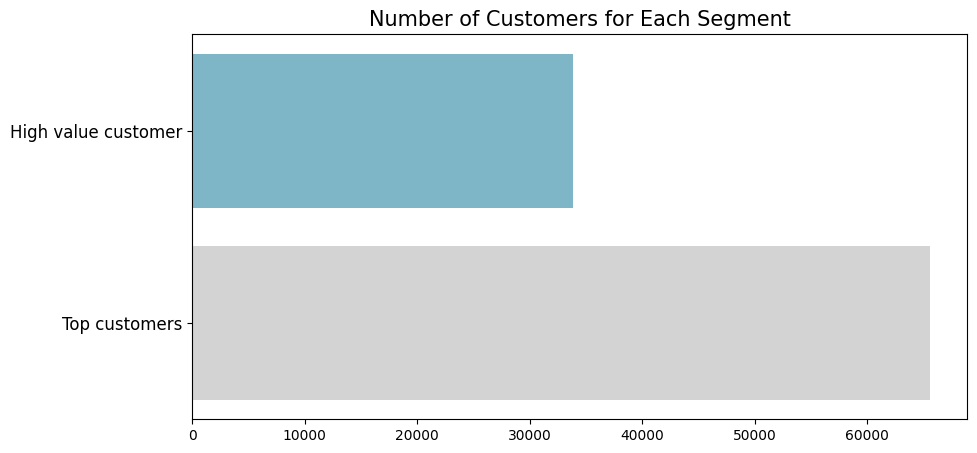

In [ ]:
# Misalnya, pastikan 'customer_segment' adalah tipe kategorikal
customer_segment_df['customer_segment'] = customer_segment_df['customer_segment'].astype('category')

plt.figure(figsize=(10, 5))

# Warna untuk setiap kategori
colors_ = ["#72BCD4", "#D3D3D3"]

# Plot bar
sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    hue="customer_segment",
    dodge=False,
    legend=False
)

# Menambahkan judul dan pengaturan sumbu
plt.title("Number of Customers for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1

Berdasarkan grafik distribusi jumlah pesanan dengan status "canceled" selama tiga tahun terakhir, terlihat bahwa jumlah pesanan yang dibatalkan meningkat setiap tahun. Pada tahun 2016, jumlah pembatalan sangat rendah, namun mulai naik di tahun 2017 dan melonjak tajam di tahun 2018, mencapai lebih dari 300 pesanan yang dibatalkan. Peningkatan ini menunjukkan adanya masalah dalam proses pemesanan atau perubahan dalam perilaku pelanggan. Oleh karena itu, penting untuk menganalisis penyebab pembatalan ini agar perusahaan dapat mengambil langkah untuk menguranginya di masa depan.

- Conclution pertanyaan 2

Grafik menunjukkan bahwa São Paulo adalah kota dengan jumlah pesanan "delivered" tertinggi pada tahun 2018, jauh mengungguli kota-kota lainnya. Kota Rio de Janeiro mengikuti di tempat kedua, namun dengan jumlah pesanan yang jauh lebih sedikit. Jumlah pesanan di kota-kota lain seperti Belo Horizonte, Brasília, dan Curitiba juga cukup signifikan, meskipun tidak mencapai angka yang sama dengan dua kota teratas. Hal ini menunjukkan konsentrasi pesanan yang tinggi di beberapa kota besar, yang mungkin mencerminkan populasi, daya beli, dan preferensi pelanggan di daerah tersebut.

- Conclution pertanyaan 3

Grafik menunjukkan bahwa jumlah pelanggan baru bervariasi sepanjang tahun 2017, dengan tren umum menunjukkan peningkatan dari bulan ke bulan, meskipun ada beberapa fluktuasi. Puncak jumlah pelanggan baru terjadi pada bulan November, yang mungkin mencerminkan faktor musiman, seperti promosi akhir tahun atau belanja liburan. Sebaliknya, bulan Januari memiliki jumlah pelanggan baru terendah, yang bisa jadi disebabkan oleh efek pasca-liburan. Secara keseluruhan, terlihat bahwa ada pertumbuhan dalam jumlah pelanggan baru, yang menunjukkan ketertarikan yang meningkat terhadap produk atau layanan yang ditawarkan.


Conclusion for all :     
Secara keseluruhan, ketiga analisis ini menunjukkan bahwa perusahaan mengalami pertumbuhan dalam jumlah pelanggan baru dan distribusi pesanan, tetapi juga menghadapi tantangan dalam hal pesanan yang dibatalkan. Hal ini menyoroti pentingnya terus memantau dan memahami dinamika pasar, serta melakukan perbaikan yang diperlukan untuk meningkatkan kepuasan pelanggan dan mengoptimalkan proses pemesanan. Dengan informasi ini, perusahaan dapat merumuskan strategi yang lebih efektif untuk meningkatkan kinerja penjualan dan mempertahankan pelanggan.